In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.13.1


In [3]:
from __future__ import absolute_import,division,print_function,unicode_literals
import pathlib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [4]:
datapath = keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

32768/30286 [================================] - 0s 1us/step


In [5]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(datapath,names= column_names,na_values ='?',comment="\t",sep=' ',skipinitialspace=True)
dataset = raw_dataset.copy()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
origin = dataset.pop('Origin')
dataset['USA'] =(origin == 1)*1.0
dataset['CANADA'] = (origin == 2)*1.0
dataset['JAPAN'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,CANADA,JAPAN
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [14]:
train_dataset = dataset.sample(frac=0.8,random_state = 1)
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,CANADA,JAPAN
174,18.0,6,171.0,97.0,2984.0,14.5,75,1.0,0.0,0.0
359,28.1,4,141.0,80.0,3230.0,20.4,81,0.0,1.0,0.0
250,19.4,8,318.0,140.0,3735.0,13.2,78,1.0,0.0,0.0
274,20.3,5,131.0,103.0,2830.0,15.9,78,0.0,1.0,0.0
283,20.2,6,232.0,90.0,3265.0,18.2,79,1.0,0.0,0.0
232,16.0,8,351.0,149.0,4335.0,14.5,77,1.0,0.0,0.0
117,29.0,4,68.0,49.0,1867.0,19.5,73,0.0,1.0,0.0
348,37.7,4,89.0,62.0,2050.0,17.3,81,0.0,0.0,1.0
189,15.5,8,304.0,120.0,3962.0,13.9,76,1.0,0.0,0.0
106,12.0,8,350.0,180.0,4499.0,12.5,73,1.0,0.0,0.0


In [15]:
test_dataset = dataset.drop(train_dataset.index)
test_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,CANADA,JAPAN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1.0,0.0,0.0
15,22.0,6,198.0,95.0,2833.0,15.5,70,1.0,0.0,0.0
22,25.0,4,104.0,95.0,2375.0,17.5,70,0.0,1.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
26,10.0,8,307.0,200.0,4376.0,15.0,70,1.0,0.0,0.0
30,28.0,4,140.0,90.0,2264.0,15.5,71,1.0,0.0,0.0
37,18.0,6,232.0,100.0,3288.0,15.5,71,1.0,0.0,0.0
43,13.0,8,400.0,170.0,4746.0,12.0,71,1.0,0.0,0.0


[]

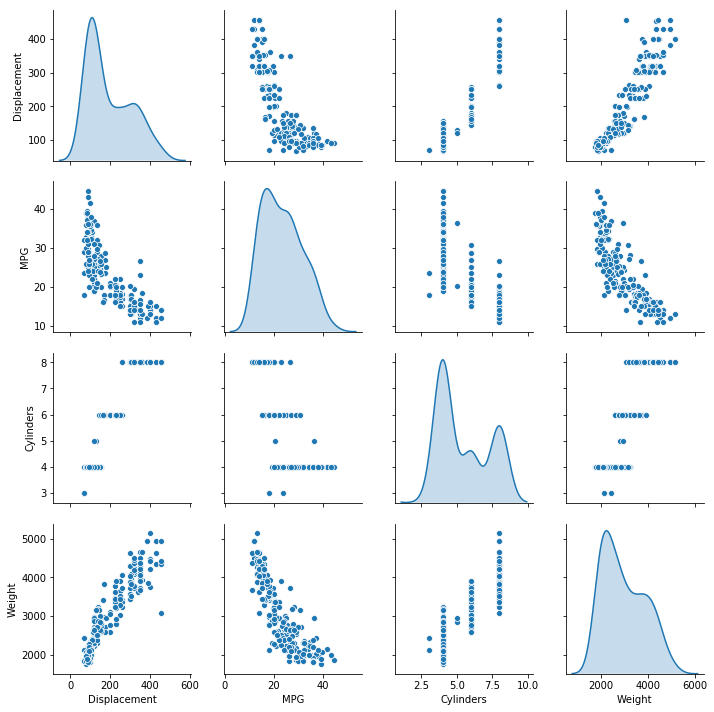

In [12]:
sb.pairplot(train_dataset[['Displacement','MPG','Cylinders','Weight']],diag_kind ="kde")
plt.plot()

In [16]:
train_status = train_dataset.describe()
train_status.pop('MPG')
train_status = train_status.transpose()
train_status

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.440252,1.685309,3.0,4.000,4.0,7.5,8.0
Displacement,318.0,192.451258,104.802315,68.0,102.000,146.0,259.5,455.0
Horsepower,314.0,103.920382,38.668783,46.0,75.000,94.5,120.0,230.0
Weight,318.0,2954.833333,855.579657,1613.0,2207.500,2750.0,3608.0,5140.0
Acceleration,318.0,15.577673,2.754206,8.0,13.925,15.5,17.2,24.8
Model Year,318.0,76.050314,3.706587,70.0,73.000,76.0,79.0,82.0
USA,318.0,0.613208,0.487783,0.0,0.000,1.0,1.0,1.0
CANADA,318.0,0.182390,0.386774,0.0,0.000,0.0,0.0,1.0
JAPAN,318.0,0.204403,0.403900,0.0,0.000,0.0,0.0,1.0


In [17]:
train_labels = train_dataset.pop('MPG')
train_labels

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
232    16.0
117    29.0
348    37.7
189    15.5
106    12.0
371    29.0
222    17.0
261    18.1
242    21.5
343    39.1
179    22.0
5      15.0
125    20.0
90     12.0
303    31.8
173    24.0
233    29.0
17     21.0
29     27.0
315    24.3
102    26.0
356    32.4
246    32.8
4      17.0
388    26.0
       ... 
202    17.5
152    19.0
325    44.3
10     15.0
269    30.9
96     13.0
210    19.0
240    30.5
57     24.0
305    28.4
36     19.0
358    31.6
20     25.0
374    23.0
75     14.0
200    18.0
77     22.0
263    17.7
392    27.0
149    24.0
351    34.4
2      18.0
52     30.0
262    19.2
253    20.5
259    20.8
183    25.0
151    31.0
362    24.2
302    34.5
Name: MPG, Length: 318, dtype: float64

In [18]:
test_labels = test_dataset.pop('MPG')
test_labels

1      15.0
3      16.0
7      14.0
15     22.0
22     25.0
25     10.0
26     10.0
30     28.0
37     18.0
43     13.0
49     23.0
50     28.0
64     15.0
68     13.0
71     19.0
72     15.0
74     13.0
76     18.0
83     28.0
86     14.0
87     13.0
104    12.0
109    21.0
115    15.0
121    15.0
126    21.0
129    31.0
133    16.0
136    16.0
141    29.0
       ... 
252    19.2
254    20.2
255    25.1
264    18.1
265    17.5
266    30.0
276    21.6
279    29.5
280    21.5
281    19.8
282    22.3
288    18.2
297    25.4
308    33.5
313    28.0
316    19.1
317    34.3
319    31.3
333    32.7
335    35.0
336    23.6
352    29.9
355    33.7
357    32.9
367    28.0
368    27.0
372    27.0
385    38.0
387    38.0
393    27.0
Name: MPG, Length: 80, dtype: float64

In [19]:
train_labels

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
232    16.0
117    29.0
348    37.7
189    15.5
106    12.0
371    29.0
222    17.0
261    18.1
242    21.5
343    39.1
179    22.0
5      15.0
125    20.0
90     12.0
303    31.8
173    24.0
233    29.0
17     21.0
29     27.0
315    24.3
102    26.0
356    32.4
246    32.8
4      17.0
388    26.0
       ... 
202    17.5
152    19.0
325    44.3
10     15.0
269    30.9
96     13.0
210    19.0
240    30.5
57     24.0
305    28.4
36     19.0
358    31.6
20     25.0
374    23.0
75     14.0
200    18.0
77     22.0
263    17.7
392    27.0
149    24.0
351    34.4
2      18.0
52     30.0
262    19.2
253    20.5
259    20.8
183    25.0
151    31.0
362    24.2
302    34.5
Name: MPG, Length: 318, dtype: float64

In [23]:
def norm(x):
    return (x-train_status['mean'])/train_status['std']
normed_trained_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_trained_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,CANADA,JAPAN
174,0.332134,-0.204683,-0.178966,0.034090,-0.391283,-0.283364,0.792960,-0.471567,-0.506072
359,-0.854592,-0.490936,-0.618597,0.321614,1.750895,1.335376,-1.257132,2.113921,-0.506072
250,1.518860,1.197958,0.933042,0.911857,-0.863288,0.526006,0.792960,-0.471567,-0.506072
274,-0.261229,-0.586354,-0.023802,-0.145905,0.117031,0.526006,-1.257132,2.113921,-0.506072
283,0.332134,0.377365,-0.359990,0.362522,0.952117,0.795796,0.792960,-0.471567,-0.506072
232,1.518860,1.512836,1.165788,1.613136,-0.391283,0.256216,0.792960,-0.471567,-0.506072
117,-0.854592,-1.187486,-1.420277,-1.271458,1.424123,-0.822944,-1.257132,2.113921,-0.506072
348,-0.854592,-0.987109,-1.084088,-1.057568,0.625344,1.335376,-1.257132,-0.471567,1.969789
189,1.518860,1.064373,0.415829,1.177175,-0.609131,-0.013574,0.792960,-0.471567,-0.506072
106,1.518860,1.503294,1.967469,1.804819,-1.117445,-0.822944,0.792960,-0.471567,-0.506072


In [22]:
normed_test_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,CANADA,JAPAN
1,1.518860,1.503294,1.579559,0.862768,-1.480526,-1.632314,0.792960,-0.471567,-0.506072
3,1.518860,1.064373,1.191649,0.558880,-1.298985,-1.632314,0.792960,-0.471567,-0.506072
7,1.518860,2.362054,2.872592,1.586254,-2.569769,-1.632314,0.792960,-0.471567,-0.506072
15,0.332134,0.052945,-0.230687,-0.142399,-0.028202,-1.632314,0.792960,-0.471567,-0.506072
22,-0.854592,-0.843982,-0.230687,-0.677708,0.697960,-1.632314,-1.257132,2.113921,-0.506072
25,1.518860,1.598712,2.872592,1.940400,-0.572823,-1.632314,0.792960,-0.471567,-0.506072
26,1.518860,1.092998,2.484682,1.661057,-0.209742,-1.632314,0.792960,-0.471567,-0.506072
30,-0.854592,-0.500478,-0.359990,-0.807445,-0.028202,-1.362524,0.792960,-0.471567,-0.506072
37,0.332134,0.377365,-0.101384,0.389405,-0.028202,-1.362524,0.792960,-0.471567,-0.506072
43,1.518860,1.980383,1.708862,2.093512,-1.298985,-1.362524,0.792960,-0.471567,-0.506072


In [26]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = tf.nn.relu,input_shape = [len(train_dataset.keys())]),
        layers.Dense(64,activation = tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mean_squared_error',optimizer = optimizer,metrics =['mean_absolute_error','mean_squared_error'])
    return model

In [27]:
model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
